In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import MaxNLocator
import scipy.integrate as integrate
import scipy.optimize as optimize
import scipy.misc as misc
import math
from numba import jit
from tqdm import tqdm
from matplotlib import animation
from IPython.display import HTML
from IPython.display import clear_output

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

from kdv_functions import *

# 1) One Soliton at constant depth

In [3]:
# Spacestep
deltaX = 0.05

# Number of Spacesteps
spacesteps = 250

# Number of Timesteps
timesteps = 30000

# Number of Solitons
N = 1

# Timestep
deltaT = Time_step(deltaX,N)

xrange= list(np.arange(-(spacesteps+1)*deltaX,(spacesteps+1)*deltaX,deltaX))

In [4]:
allData_1, allTimes_1 = ZabuskyKruskal(N, timesteps, spacesteps, deltaT, deltaX)

100%|███████████████████████████████████| 29998/29998 [00:20<00:00, 1471.58it/s]


100%|███████████████████████████████████████| 301/301 [00:00<00:00, 6700.31it/s]


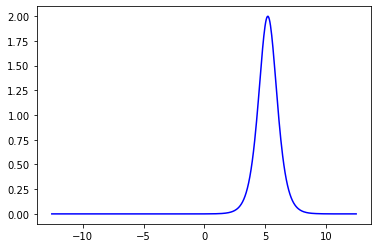

In [5]:
step_in_time = 100
ani_interval = 300

xrange= list(np.arange(-(spacesteps+1)*deltaX,(spacesteps+1)*deltaX,deltaX))

fig = plt.figure()
ims = []

for i in tqdm(range(0,len(allData_1),1)):
    
    if i%step_in_time==0:
        im = plt.plot(xrange,allData_1[i],color = 'b')
        ims.append(im)
    
ani = animation.ArtistAnimation(fig, ims, interval=ani_interval, blit=True)
HTML(ani.to_html5_video())

## 1.1) Evaluating the integrals

In [6]:
times = np.arange(0,timesteps*deltaT,step=deltaT)
integrals_1, umaxs_1 = INTEGRATER_2(allData_1, allTimes_1, deltaX,deltaT) 

100%|████████████████████████████████████████| 301/301 [00:01<00:00, 172.09it/s]


<Figure size 432x288 with 0 Axes>

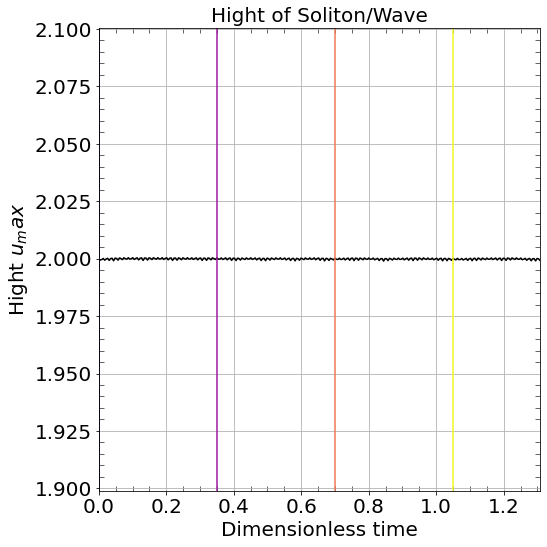

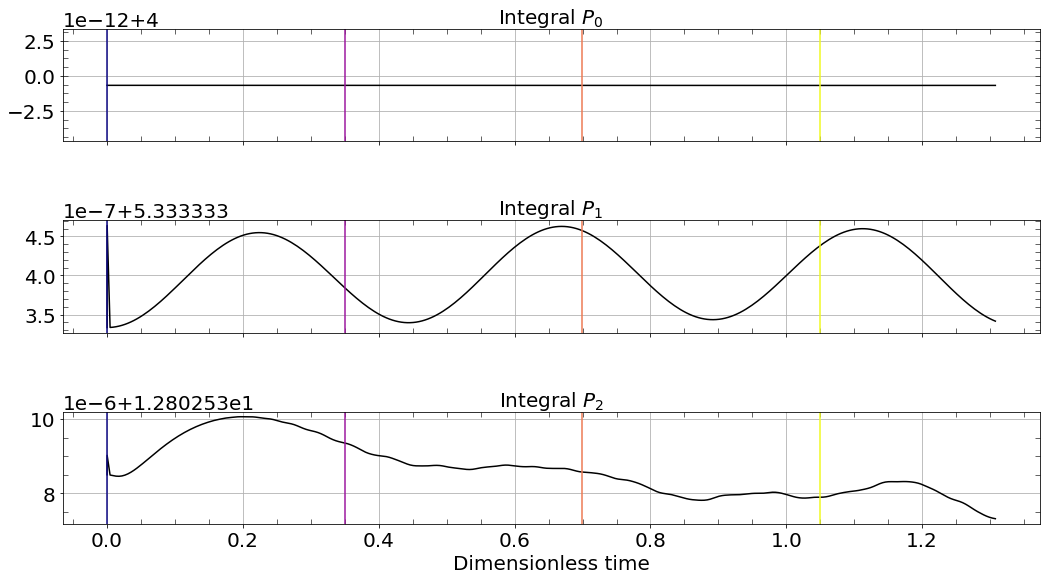

<Figure size 432x288 with 0 Axes>

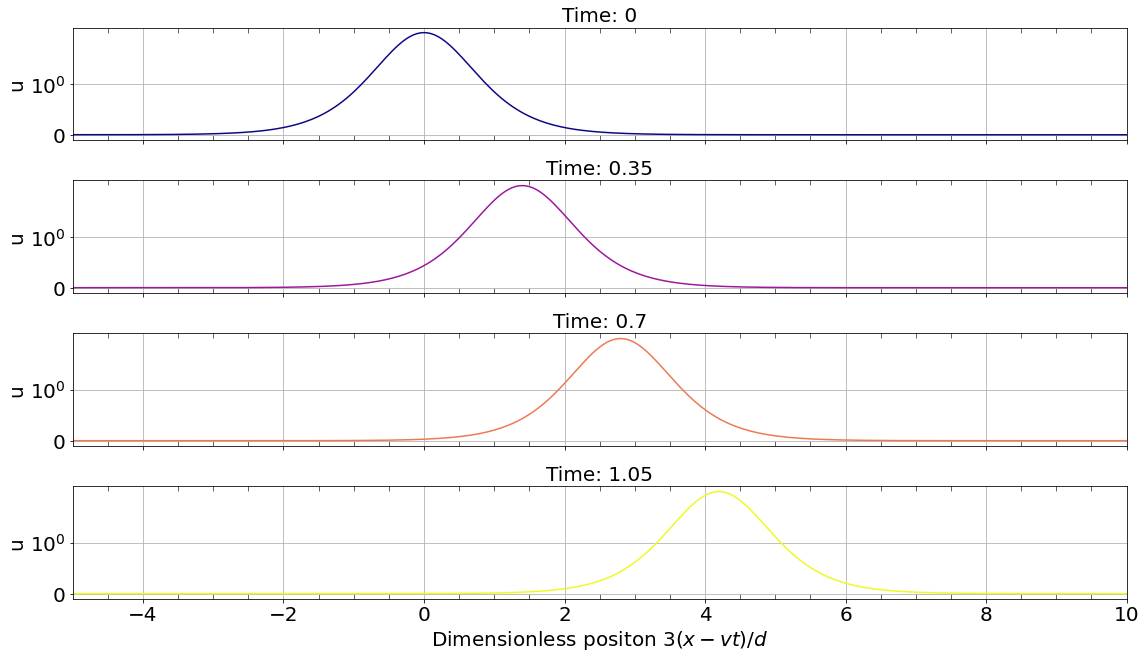

In [7]:
name = '1_soliton_dconst'
positionrange = [-5,10]
timerange = [allTimes_1[0],allTimes_1[-1]]

Plot_u_time(umaxs_1[0],umaxs_1[1],name+'wavehight',deltaT,timerange=timerange)
Plotter_Integrals(allData_1,allTimes_1,integrals_1,xrange,deltaT,name+'_int',timerange=timerange)  
Plotter_Waves(allData_1,allTimes_1,integrals_1,xrange,deltaT,name+'_waves',positionrange=positionrange,timerange=timerange)  

# 3 Soliton at constant depth

In [8]:
# Number of Solitons
N_3 = 3

# Timestep
deltaT_3 = Time_step(deltaX,N_3 )

In [9]:
allData_3, allTimes_3 = ZabuskyKruskal(N_3 , timesteps, spacesteps, deltaT_3 , deltaX)

100%|███████████████████████████████████| 29998/29998 [00:18<00:00, 1615.41it/s]


100%|██████████████████████████████████████| 301/301 [00:00<00:00, 28689.59it/s]


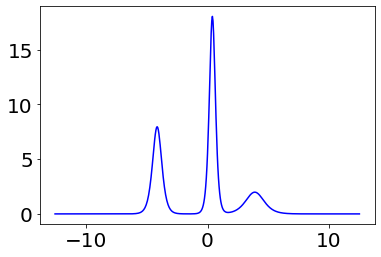

In [10]:
step_in_time = 10
ani_interval = 300

#xrange= list(np.arange(-(spacesteps+1)*deltaX,(spacesteps+1)*deltaX,deltaX))

ims = []

fig,ax = plt.subplots(1)

for i in tqdm(range(0,len(allData_3),1)):

    if i%step_in_time==0:

        plot=ax.plot(xrange,allData_3[i],color = 'b')
        im =plot
        ims.append(im)
        
        
        
ani = animation.ArtistAnimation(fig, ims, interval=ani_interval, blit=True)
HTML(ani.to_html5_video())

## 2.1) Evaluating the Integrals

In [11]:
integrals_3, umaxs_3 = INTEGRATER_2(allData_3, allTimes_3, deltaX,deltaT_3) 

100%|████████████████████████████████████████| 301/301 [00:01<00:00, 172.72it/s]


In [12]:
name = '3_soliton_dconst'
positionrange_3 = [xrange[0],xrange[-1]]

timerange_3 = [0.68,0.8]
timeres_3 = 800

int_0_3, mean_value_0_3, std_dev_0_3=FILTERED_MEAN_STD(integrals_3[0],allTimes_3,steps = 0.000001)
int_1_3, mean_value_1_3, std_dev_1_3=FILTERED_MEAN_STD(integrals_3[1],allTimes_3,steps = 0.01)
int_2_3, mean_value_2_3, std_dev_2_3=FILTERED_MEAN_STD(integrals_3[2],allTimes_3,steps = 0.01)

int_0_3 = [int_0_3, mean_value_0_3, std_dev_0_3]
int_1_3 = [int_1_3, mean_value_1_3, std_dev_1_3]
int_2_3 = [int_2_3, mean_value_2_3, std_dev_2_3]



100%|█████████████████████████████████████| 203/203 [00:00<00:00, 166786.23it/s]


In [13]:
vel_3=VELOCITY_CALC(allData_3,xrange,allTimes_3)

100%|██████████████████████████████████████| 300/300 [00:00<00:00, 18305.35it/s]


In [73]:
print(f'DeltaT: {deltaT_3}, Totaltime: {deltaT_3*timesteps}\n')
print(f'P_0 mean: {mean_value_0_3}, P_0 std: {std_dev_0_3}\n')
print(f'P_1 mean: {mean_value_1_3}, P_1 std: {std_dev_1_3}\n')
print(f'P_2 mean: {mean_value_2_3}, P_2 std: {std_dev_2_3}\n')
print(f'velocity mean: {vel_3[2]}, velocity std: {vel_3[3]}\n')
print(f'velocity max: {np.amax(vel_3[0])}, velocity min: {np.amin(vel_3[0])}\n')

DeltaT: 4.606518105236377e-05, Totaltime: 1.381955431570913

P_0 mean: 23.999999999395985, P_0 std: 8.072396167913526e-15

P_1 mean: 192.0014094775291, P_1 std: 0.00025088324319744745

P_2 mean: 3547.0717445284654, P_2 std: 0.0027510379479769626

velocity mean: 36.13155840566558, velocity std: 5.328887393286836

velocity max: 54.270925303825585, velocity min: 21.708370121530223



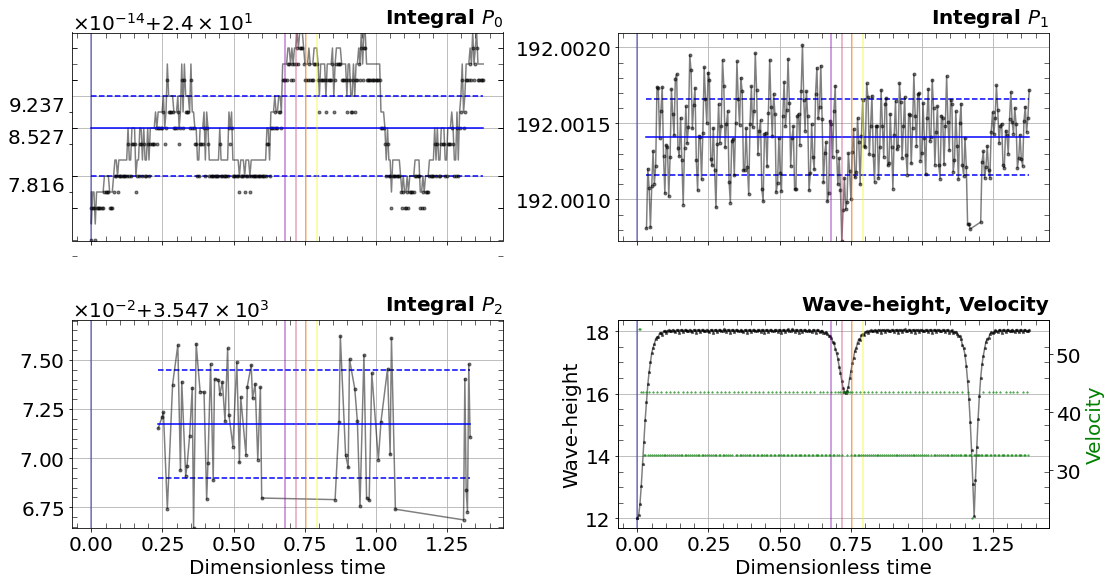

In [15]:
Plotter_Constants(int_0_3,
                  int_1_3,
                  int_2_3,
                  [umaxs_3[1],umaxs_3[0]],
                  vel_3,
                  allData_3,
                  allTimes_3,
                  integrals_3,
                  xrange,
                  deltaT_3,
                  name+'_int',
                  timerange=timerange_3,
                  timeres=timeres_3) 

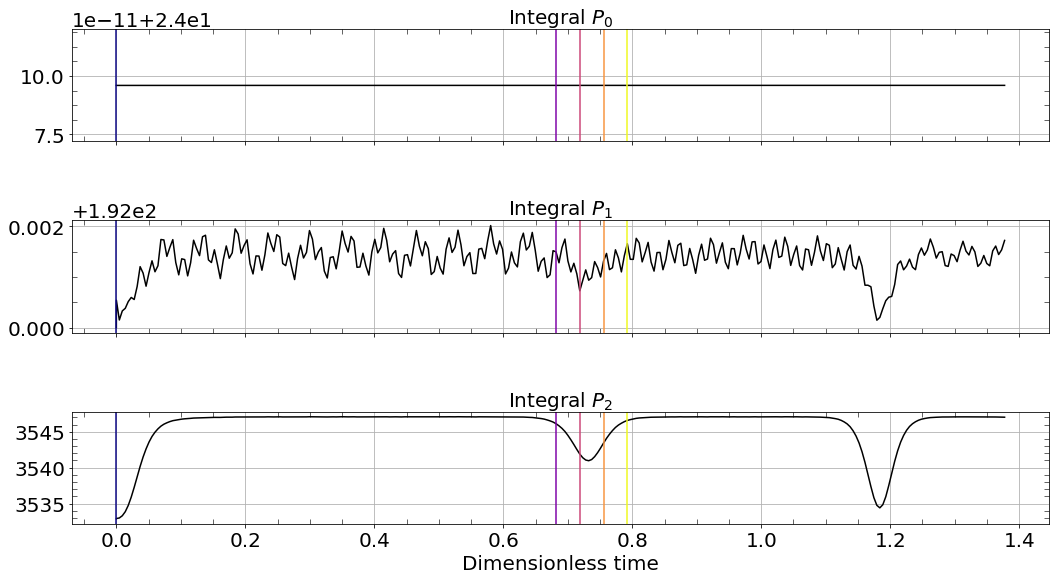

<Figure size 432x288 with 0 Axes>

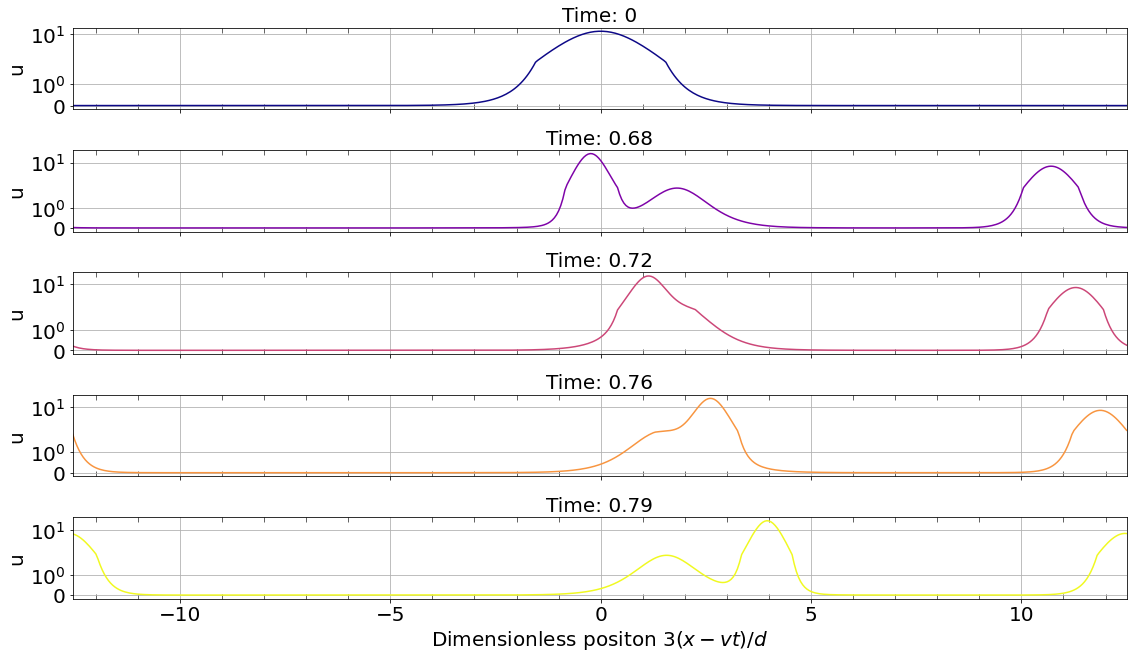

In [16]:
Plotter_Integrals(allData_3,
                  allTimes_3,
                  integrals_3,
                  xrange,
                  deltaT_3,
                  name+'_int',
                  timerange=timerange_3,
                  timeres=timeres_3) 

Plotter_Waves(allData_3,
              allTimes_3,
              integrals_3,
              xrange,
              deltaT_3,name+'_waves',
              positionrange=positionrange_3,
              timerange=timerange_3,
              timeres=timeres_3)  

# 3) 2.5 Soliton solution

In [17]:
# Number of Solitons
N_2_5 = 2.5

# Timestep
deltaT_2_5 = Time_step(deltaX,N_2_5)

In [18]:
allData_2_5, allTimes_2_5 = ZabuskyKruskal(N_2_5, timesteps, spacesteps, deltaT_2_5, deltaX)

100%|███████████████████████████████████| 29998/29998 [00:17<00:00, 1668.97it/s]


100%|████████████████████████████████████████| 301/301 [00:00<00:00, 961.91it/s]


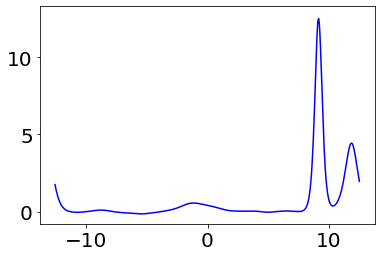

In [19]:
step_in_time = 1
ani_interval = 300


fig = plt.figure()
ims_2_5 = []

for i in tqdm(range(0,len(allData_2_5),1)):
    
    if i%step_in_time==0:
        im = plt.plot(xrange,allData_2_5[i],color = 'b')
        ims_2_5.append(im)
    
ani_2_5 = animation.ArtistAnimation(fig, ims_2_5, interval=ani_interval, blit=True)
HTML(ani_2_5.to_html5_video())

## 3.1) Evaluating the Integrals

In [20]:
integrals_2_5, umaxs_2_5 = INTEGRATER_2(allData_2_5, allTimes_2_5, deltaX,deltaT_2_5) 

100%|████████████████████████████████████████| 301/301 [00:01<00:00, 154.38it/s]


In [21]:
name = '2_5_soliton_dconst'
positionrange = [xrange[0],xrange[-1]]
timerange_2_5 = [0.78,1.10]
timeres_2_5 = 2000

int_0_2_5, mean_value_0_2_5, std_dev_0_2_5=FILTERED_MEAN_STD(integrals_2_5[0],
                                                             allTimes_2_5,
                                                             steps = 0.001,
                                                             filtering=True)
int_1_2_5, mean_value_1_2_5, std_dev_1_2_5=FILTERED_MEAN_STD(integrals_2_5[1],
                                                             allTimes_2_5,
                                                             steps = 1,
                                                            filtering=True)
int_2_2_5, mean_value_2_2_5, std_dev_2_2_5=FILTERED_MEAN_STD(integrals_2_5[2],
                                                             allTimes_2_5,
                                                             steps = 1,
                                                            filtering=True)

int_0_2_5 = [int_0_2_5, mean_value_0_2_5, std_dev_0_2_5]
int_1_2_5 = [int_1_2_5, mean_value_1_2_5, std_dev_1_2_5]
int_2_2_5 = [int_2_2_5, mean_value_2_2_5, std_dev_2_2_5]

vel_2_5=VELOCITY_CALC(allData_2_5,xrange,allTimes_2_5)

100%|██████████████████████████████████████| 300/300 [00:00<00:00, 16174.86it/s]


In [72]:
print(f'DeltaT: {deltaT_2_5}, Totaltime: {deltaT_2_5*timesteps}\n')
print(f'P_0 mean: {mean_value_0_2_5}, P_0 std: {std_dev_0_2_5}\n')
print(f'P_1 mean: {mean_value_1_2_5}, P_1 std: {std_dev_1_2_5}\n')
print(f'P_2 mean: {mean_value_2_2_5}, P_2 std: {std_dev_2_2_5}\n')
print(f'velocity mean: {vel_2_5[2]}, velocity std: {vel_2_5[3]}\n')
print(f'velocity max: {np.amax(vel_2_5[0])}, velocity min: {np.amin(vel_2_5[0])}\n')

DeltaT: 4.5282374054088306e-05, Totaltime: 1.358471221622649

P_0 mean: 17.499999999559552, P_0 std: 7.645543211364515e-15

P_1 mean: 102.0835920436994, P_1 std: 6.82054055181071e-05

P_2 mean: 1351.0964113113937, P_2 std: 0.0648677489045276

velocity mean: 25.27171151982084, velocity std: 5.169630840057075

velocity max: 44.61342989192625, velocity min: 22.08364779650279



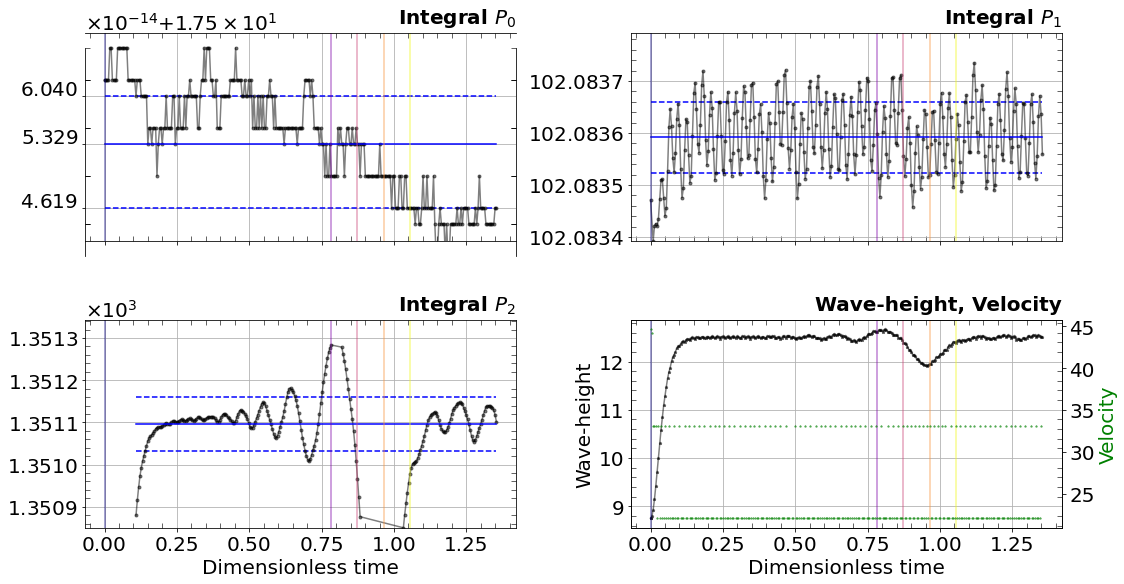

In [23]:
Plotter_Constants(int_0_2_5,
                  int_1_2_5,
                  int_2_2_5,
                  [umaxs_2_5[1],umaxs_2_5[0]],
                  vel_2_5,
                  allData_2_5,
                  allTimes_2_5,
                  integrals_2_5,
                  xrange,
                  deltaT_2_5,
                  name+'_int',
                  timerange=timerange_2_5,
                  timeres=timeres_2_5) 

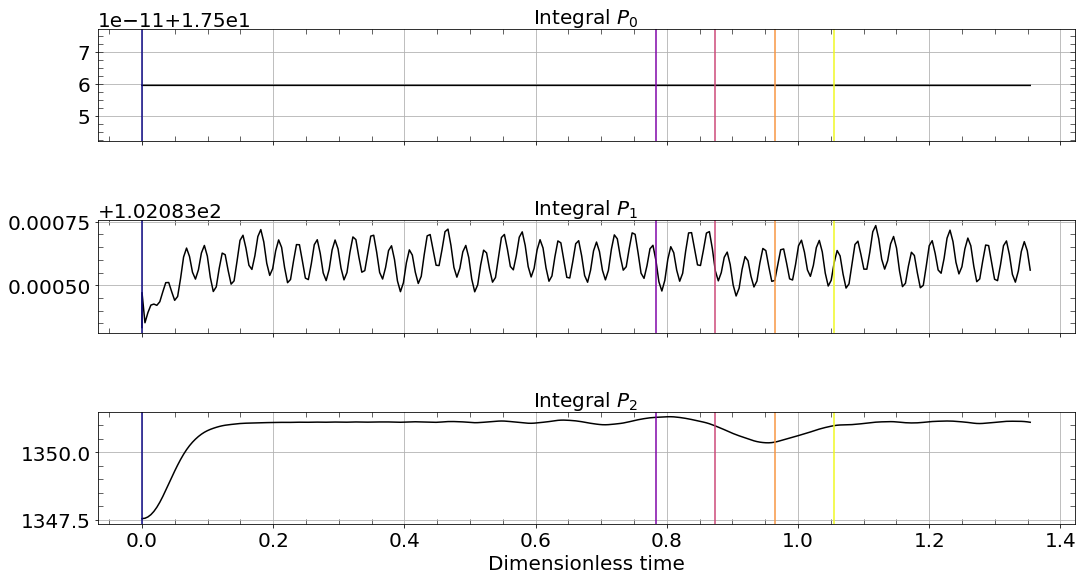

<Figure size 432x288 with 0 Axes>

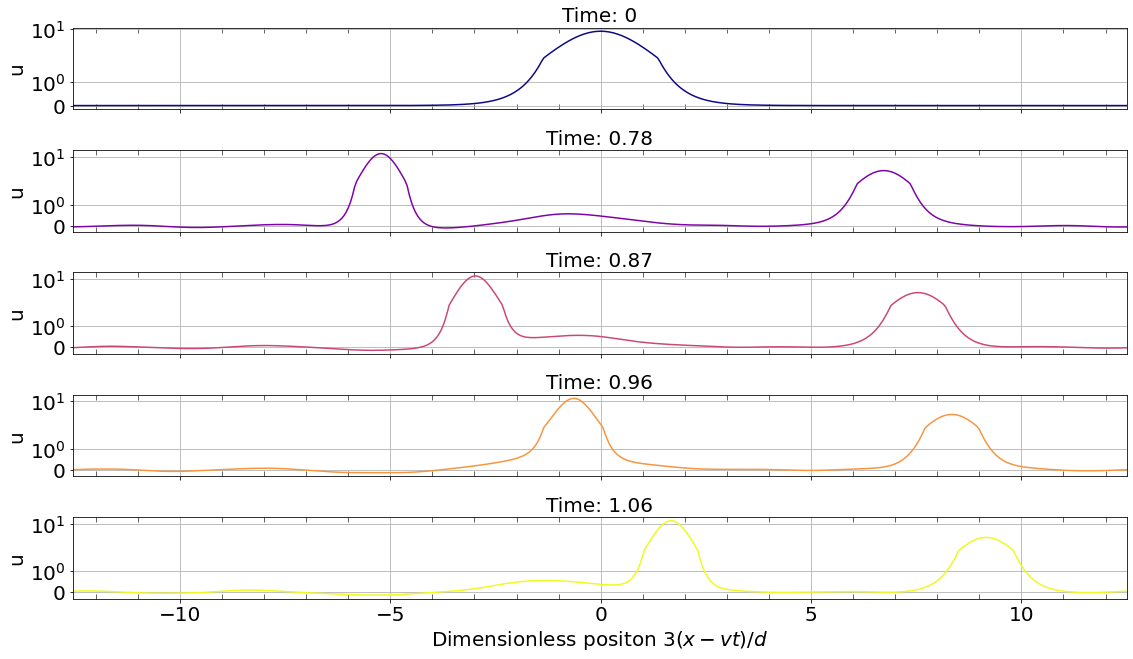

In [24]:
Plotter_Integrals(allData_2_5,
                  allTimes_2_5,
                  integrals_2_5,
                  xrange,
                  deltaT_2_5,
                  name+'_int',
                  timerange=timerange_2_5,
                  timeres=timeres_2_5)  

Plotter_Waves(allData_2_5,
              allTimes_2_5,
              integrals_2_5,
              xrange,
              deltaT_2_5,
              name+'_waves',
              positionrange=positionrange,
              timerange=timerange_2_5,
              timeres=timeres_2_5)     

# 4) One soliton and depth profile

## 4.1) h_0 = 0.5

In [25]:
# Number of Solitons
N_depth_1 = 1

# depth at the end
h_0 = 0.5

# Length after which the the step begins
L = deltaX * 100
x_shift=deltaX * 70

# Timestep
deltaT_depth_1 = Time_step(deltaX,N_depth_1)

In [26]:
allData_depth_1, allTimes_depth_1 = ZabuskyKruskal_DEPTH(N_depth_1, 
                                                         timesteps, 
                                                         spacesteps, 
                                                         deltaT_depth_1, 
                                                         deltaX,h_0,
                                                         L,
                                                         x_shift=x_shift)

100%|████████████████████████████████████| 29998/29998 [00:32<00:00, 932.70it/s]


100%|███████████████████████████████████████| 301/301 [00:00<00:00, 2954.05it/s]


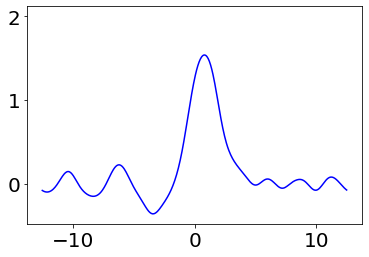

In [27]:
step_in_time = 1
ani_interval = 300


fig = plt.figure()
ims_depth_1 = []

for i in tqdm(range(0,len(allData_depth_1),1)):
    
    if i%step_in_time==0:
        im = plt.plot(xrange,allData_depth_1[i],color = 'b')
        ims_depth_1.append(im)
    
ani_depth_1 = animation.ArtistAnimation(fig, ims_depth_1, interval=ani_interval, blit=True)
HTML(ani_depth_1.to_html5_video())

## 4.1.1) Evaluating the Integrals

In [28]:
integrals_depth_1, umaxs_depth_1 = INTEGRATER_2(allData_depth_1, allTimes_depth_1, deltaX,deltaT_depth_1) 

100%|████████████████████████████████████████| 301/301 [00:01<00:00, 162.15it/s]


In [29]:
name = '1_soliton_h0_5'
positionrange = [xrange[0],xrange[-1]]
timerange_depth_1 = [1.2,1.31]
timeres_depth_1 = 2000

int_0_depth_1, mean_value_0_depth_1, std_dev_0_depth_1=FILTERED_MEAN_STD(integrals_depth_1[0],
                                                                         allTimes_depth_1,
                                                                         steps = 0.1,filtering=False)
int_1_depth_1, mean_value_1_depth_1, std_dev_1_depth_1=FILTERED_MEAN_STD(integrals_depth_1[1],
                                                                         allTimes_depth_1,
                                                                         steps = 0.1,filtering=False)
int_2_depth_1, mean_value_2_depth_1, std_dev_2_depth_1=FILTERED_MEAN_STD(integrals_depth_1[2],
                                                                         allTimes_depth_1,
                                                                         steps = 0.1,filtering=False)

int_0_depth_1 = [int_0_depth_1, mean_value_0_depth_1, std_dev_0_depth_1]
int_1_depth_1 = [int_1_depth_1, mean_value_1_depth_1, std_dev_1_depth_1]
int_2_depth_1 = [int_2_depth_1, mean_value_2_depth_1, std_dev_2_depth_1]

vel_depth_1=VELOCITY_CALC(allData_depth_1,xrange,allTimes_depth_1,useIQR=False)

100%|██████████████████████████████████████| 300/300 [00:00<00:00, 16323.00it/s]


In [30]:
print(f'DeltaT: {deltaT_depth_1}, Totaltime: {deltaT_depth_1*timesteps}\n')
print(f'P_0 mean: {mean_value_0_depth_1}, P_0 std: {std_dev_0_depth_1}\n')
print(f'P_1 mean: {mean_value_1_depth_1}, P_1 std: {std_dev_1_depth_1}\n')
print(f'P_2 mean: {mean_value_2_depth_1}, P_2 std: {std_dev_2_depth_1}\n')
print(f'velocity mean: {vel_depth_1[2]}, velocity std: {vel_depth_1[3]}\n')

DeltaT: 4.373865675678984e-05, Totaltime: 1.3121597027036953

P_0 mean: 3.9933511869034573, P_0 std: 0.008528394022426437

P_1 mean: 5.340796953435125, P_1 std: 0.006943533082389407

P_2 mean: 11.198995537429933, P_2 std: 0.7628257948158633

velocity mean: 0.6096818842642545, velocity std: 2.887955678330313



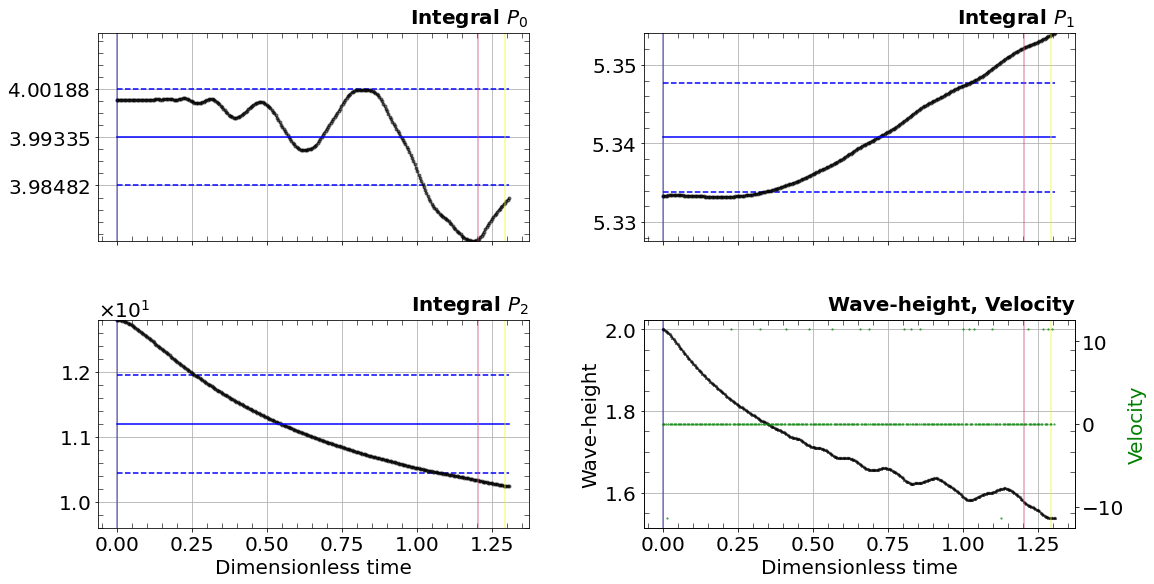

In [31]:
Plotter_Constants(int_0_depth_1,
                  int_1_depth_1,
                  int_2_depth_1,
                  [umaxs_depth_1[1],umaxs_depth_1[0]],
                  vel_depth_1,
                  allData_depth_1,
                  allTimes_depth_1,
                  integrals_depth_1,
                  xrange,
                  deltaT_depth_1,
                  name+'_int',
                  timerange=timerange_depth_1,
                  timeres=timeres_depth_1) 

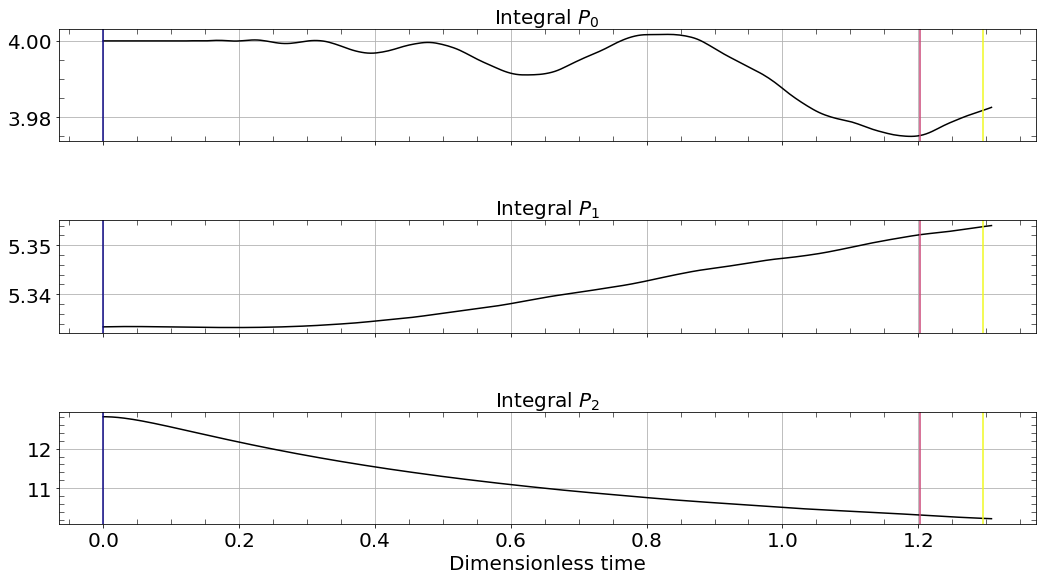

<Figure size 432x288 with 0 Axes>

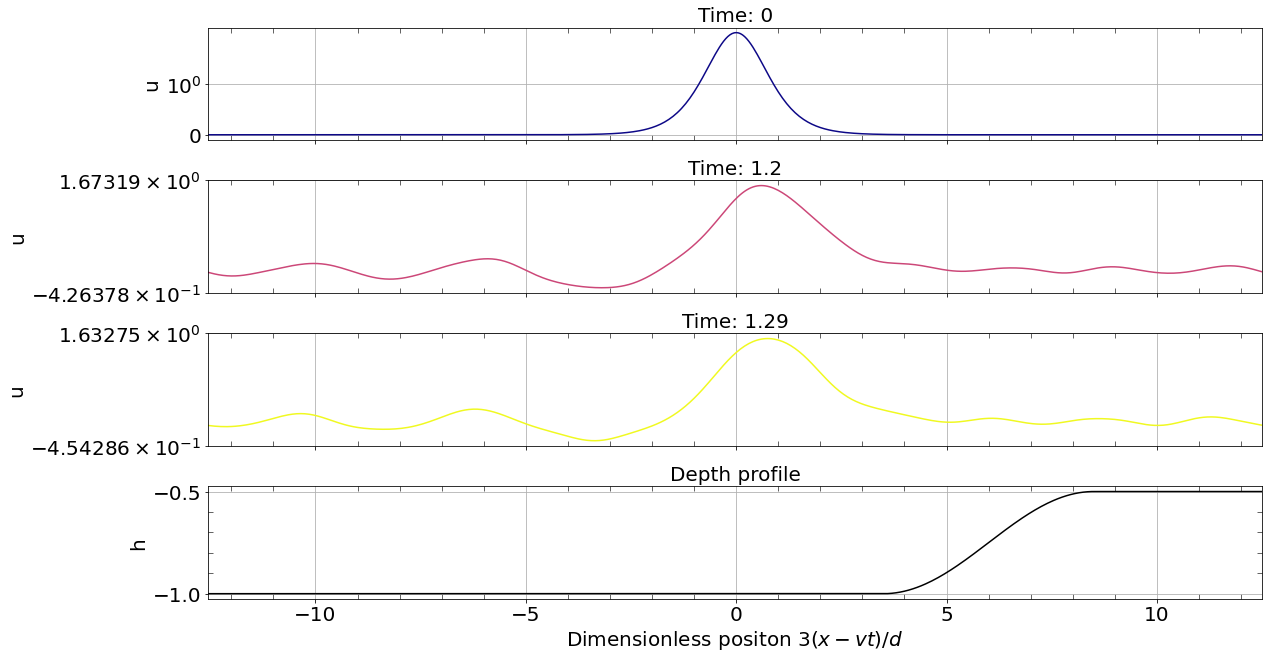

In [32]:
Plotter_Integrals(allData_depth_1,
                  allTimes_depth_1,
                  integrals_depth_1,
                  xrange,
                  deltaT_depth_1,
                  name+'_int',
                  timerange=timerange_depth_1,
                  timeres=timeres_depth_1)  

Plotter_Waves_DEPTH(allData_depth_1,
                    allTimes_depth_1,
                    integrals_depth_1,
                    xrange,
                    deltaT_depth_1,
                    name+'_waves',
                    h_0,
                    L,
                    positionrange=positionrange,
                    timerange=timerange_depth_1,
                    timeres=timeres_depth_1,
                    x_shift=x_shift)   


## 4.2) h_0 = 0.1

In [33]:
# depth at the end
h_0_1 = 0.1
allData_depth_11, allTimes_depth_11 = ZabuskyKruskal_DEPTH(N_depth_1,
                                                           timesteps,
                                                           spacesteps,
                                                           deltaT_depth_1,
                                                           deltaX,
                                                           h_0_1,
                                                           L,
                                                           x_shift=x_shift)

100%|████████████████████████████████████| 29998/29998 [00:31<00:00, 966.85it/s]


100%|███████████████████████████████████████| 301/301 [00:00<00:00, 2737.19it/s]


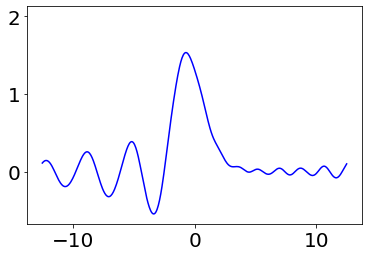

In [34]:
step_in_time = 1
ani_interval = 300

fig = plt.figure()
ims_depth_11 = []

for i in tqdm(range(0,len(allData_depth_11),1)):
    
    if i%step_in_time==0:
        im = plt.plot(xrange,allData_depth_11[i],color = 'b')
        ims_depth_11.append(im)
    
ani_depth_11 = animation.ArtistAnimation(fig, ims_depth_11, interval=ani_interval, blit=True)
HTML(ani_depth_11.to_html5_video())

## 4.2.1) Evaluating the Integrals

In [35]:
integrals_depth_11, umaxs_depth_11 = INTEGRATER_2(allData_depth_11, allTimes_depth_11, deltaX,deltaT_depth_1) 

100%|████████████████████████████████████████| 301/301 [00:01<00:00, 170.22it/s]


In [36]:
name = '1_soliton_h0_1'
positionrange = [xrange[0],xrange[-1]]
timerange_depth_11 = [1.2,1.31]
timeres_depth_11 = 2000

int_0_depth_11, mean_value_0_depth_11, std_dev_0_depth_11=FILTERED_MEAN_STD(integrals_depth_11[0],
                                                                            allTimes_depth_11,
                                                                            steps = 0.1,
                                                                           filtering=False)
int_1_depth_11, mean_value_1_depth_11, std_dev_1_depth_11=FILTERED_MEAN_STD(integrals_depth_11[1],
                                                                            allTimes_depth_11,
                                                                            steps = 0.1,
                                                                           filtering=False)
int_2_depth_11, mean_value_2_depth_11, std_dev_2_depth_11=FILTERED_MEAN_STD(integrals_depth_11[2],
                                                                            allTimes_depth_11,
                                                                            steps = 0.1,
                                                                           filtering=False)

int_0_depth_11 = [int_0_depth_11, mean_value_0_depth_11, std_dev_0_depth_11]
int_1_depth_11 = [int_1_depth_11, mean_value_1_depth_11, std_dev_1_depth_11]
int_2_depth_11 = [int_2_depth_11, mean_value_2_depth_11, std_dev_2_depth_11]

vel_depth_11=VELOCITY_CALC(allData_depth_11,xrange,allTimes_depth_11,useIQR=False)

100%|██████████████████████████████████████| 300/300 [00:00<00:00, 18649.36it/s]


In [37]:
print(f'DeltaT: {deltaT_depth_1}, Totaltime: {deltaT_depth_1*timesteps}\n')
print(f'P_0 mean: {mean_value_0_depth_11}, P_0 std: {std_dev_0_depth_11}\n')
print(f'P_1 mean: {mean_value_1_depth_11}, P_1 std: {std_dev_1_depth_11}\n')
print(f'P_2 mean: {mean_value_2_depth_11}, P_2 std: {std_dev_2_depth_11}\n')
print(f'velocity mean: {vel_depth_11[2]}, velocity std: {vel_depth_11[3]}\n')

DeltaT: 4.373865675678984e-05, Totaltime: 1.3121597027036953

P_0 mean: 3.9909545051416937, P_0 std: 0.01790708639893439

P_1 mean: 5.393331311895931, P_1 std: 0.05272906548381585

P_2 mean: 10.261866801632864, P_2 std: 1.5835194602623408

velocity mean: 3.200444992207872, velocity std: 65.98186717800895



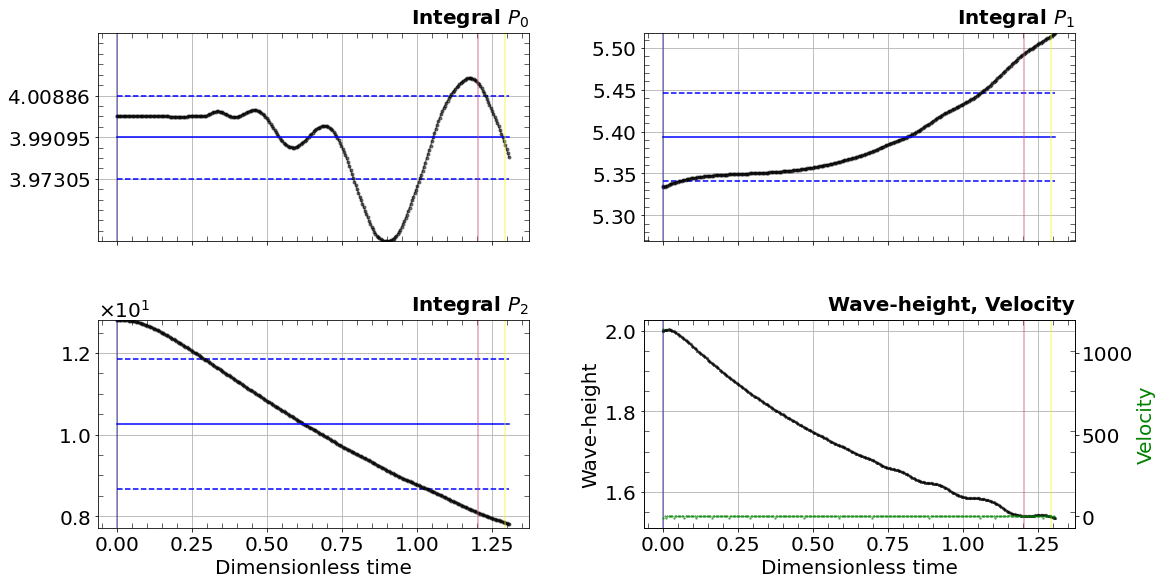

In [38]:
Plotter_Constants(int_0_depth_11,
                  int_1_depth_11,
                  int_2_depth_11,
                  [umaxs_depth_11[1],umaxs_depth_11[0]],
                  vel_depth_11,
                  allData_depth_11,
                  allTimes_depth_11,
                  integrals_depth_11,
                  xrange,
                  deltaT_depth_1,
                  name+'_int',
                  timerange=timerange_depth_11,
                  timeres=timeres_depth_11) 

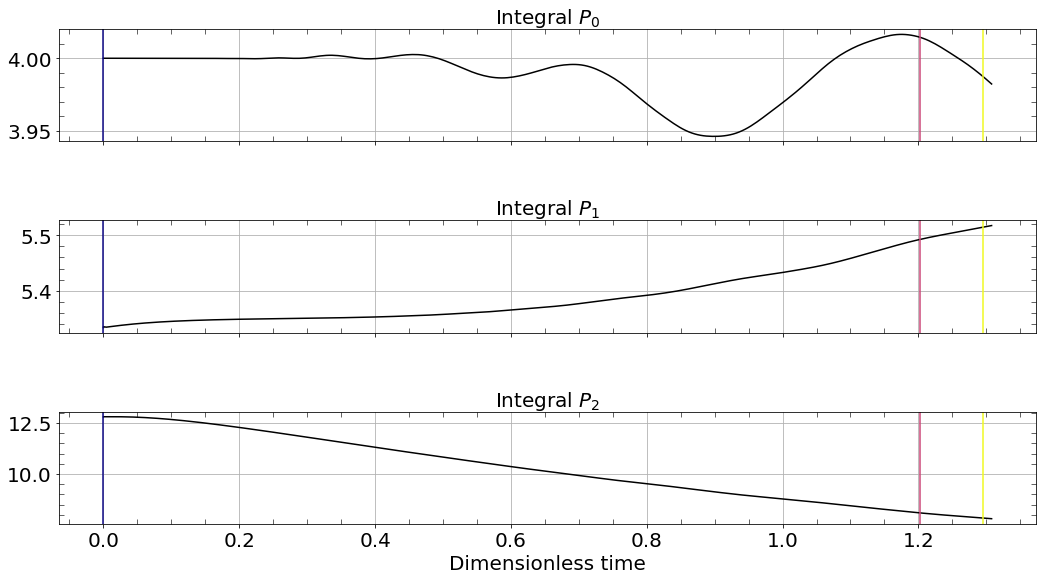

<Figure size 432x288 with 0 Axes>

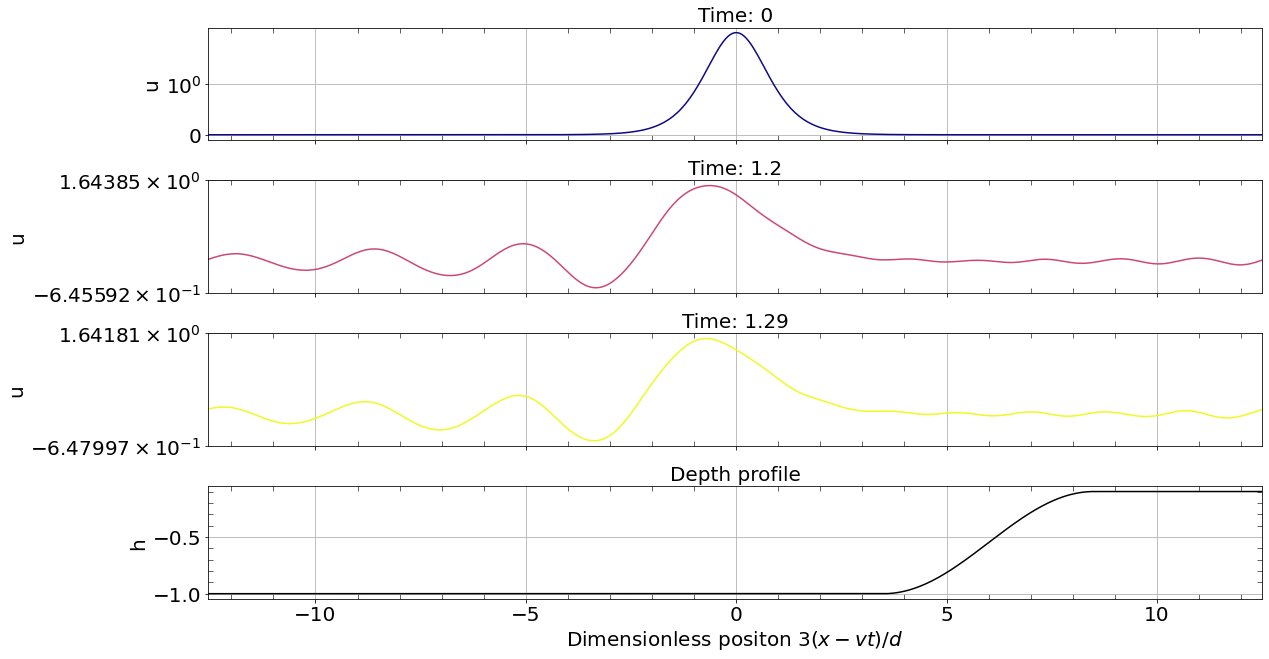

In [39]:
Plotter_Integrals(allData_depth_11,
                  allTimes_depth_11,
                  integrals_depth_11,
                  xrange,
                  deltaT_depth_1,
                  name+'_int',
                  timerange=timerange_depth_11,
                  timeres=timeres_depth_11) 

Plotter_Waves_DEPTH(allData_depth_11,
                    allTimes_depth_11,
                    integrals_depth_11,
                    xrange,
                    deltaT_depth_1,
                    name+'_waves',
                    h_0_1,
                    L,
                    positionrange=positionrange,
                    timerange=timerange_depth_11,
                    timeres=timeres_depth_11,
                    x_shift=x_shift)     

## 4.3) h_0 = 0.9

In [96]:
# depth at the end
h_0_2 = 0.9
x_shift=0
allData_depth_12, allTimes_depth_12 = ZabuskyKruskal_DEPTH(N_depth_1,
                                                           timesteps,
                                                           spacesteps,
                                                           deltaT_depth_1,
                                                           deltaX,
                                                           h_0_2,
                                                           L,
                                                           x_shift=x_shift)

100%|████████████████████████████████████| 29998/29998 [00:35<00:00, 845.95it/s]


100%|███████████████████████████████████████| 301/301 [00:00<00:00, 1809.61it/s]


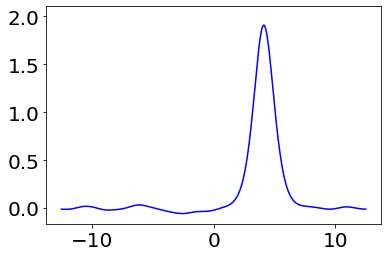

In [97]:
step_in_time = 1
ani_interval = 300


fig = plt.figure()
ims_depth_12 = []

for i in tqdm(range(0,len(allData_depth_12),1)):
    
    if i%step_in_time==0:
        im = plt.plot(xrange,allData_depth_12[i],color = 'b')
        ims_depth_12.append(im)
    
ani_depth_12 = animation.ArtistAnimation(fig, ims_depth_12, interval=ani_interval, blit=True)
HTML(ani_depth_12.to_html5_video())

## 4.3.1) Evaluating the Integrals

In [103]:
integrals_depth_12, umaxs_depth_12 = INTEGRATER_2(allData_depth_12, allTimes_depth_12, deltaX,deltaT_depth_1) 

100%|████████████████████████████████████████| 301/301 [00:02<00:00, 103.00it/s]


In [104]:
name = '1_soliton_h0_9'
positionrange = [xrange[0],xrange[-1]]
timerange_depth_12 = [0.3,1.31]
timeres_depth_12 = 7000

int_0_depth_12, mean_value_0_depth_12, std_dev_0_depth_12=FILTERED_MEAN_STD(integrals_depth_12[0],
                                                                            allTimes_depth_12,
                                                                            steps = 0.01)
int_1_depth_12, mean_value_1_depth_12, std_dev_1_depth_12=FILTERED_MEAN_STD(integrals_depth_12[1],
                                                                            allTimes_depth_12,
                                                                            steps = 0.01)
int_2_depth_12, mean_value_2_depth_12, std_dev_2_depth_12=FILTERED_MEAN_STD(integrals_depth_12[2],
                                                                            allTimes_depth_12,
                                                                            steps = 0.5)

int_0_depth_12 = [int_0_depth_12, mean_value_0_depth_12, std_dev_0_depth_12]
int_1_depth_12 = [int_1_depth_12, mean_value_1_depth_12, std_dev_1_depth_12]
int_2_depth_12 = [int_2_depth_12, mean_value_2_depth_12, std_dev_2_depth_12]

vel_depth_12=VELOCITY_CALC(allData_depth_12,xrange,allTimes_depth_12)

100%|██████████████████████████████████████| 300/300 [00:00<00:00, 11503.96it/s]


In [105]:
print(f'DeltaT: {deltaT_depth_1}, Totaltime: {deltaT_depth_1*timesteps}\n')
print(f'P_0 mean: {mean_value_0_depth_12}, P_0 std: {std_dev_0_depth_12}\n')
print(f'P_1 mean: {mean_value_1_depth_12}, P_1 std: {std_dev_1_depth_12}\n')
print(f'P_2 mean: {mean_value_2_depth_12}, P_2 std: {std_dev_2_depth_12}\n')
print(f'velocity mean: {vel_depth_12[2]}, velocity std: {vel_depth_12[3]}\n')
print(f'velocity max: {np.amax(vel_depth_12[0])}, velocity min: {np.amin(vel_depth_12[0])}\n')

DeltaT: 4.373865675678984e-05, Totaltime: 1.3121597027036953

P_0 mean: 3.999960328824262, P_0 std: 0.00012753986015086698

P_1 mean: 5.333319826887865, P_1 std: 0.00017798799854636617

P_2 mean: 12.730764457911754, P_2 std: 0.02412710359301787

velocity mean: 3.1246196568542968, velocity std: 5.094698420907826

velocity max: 11.431535329955025, velocity min: 0.0



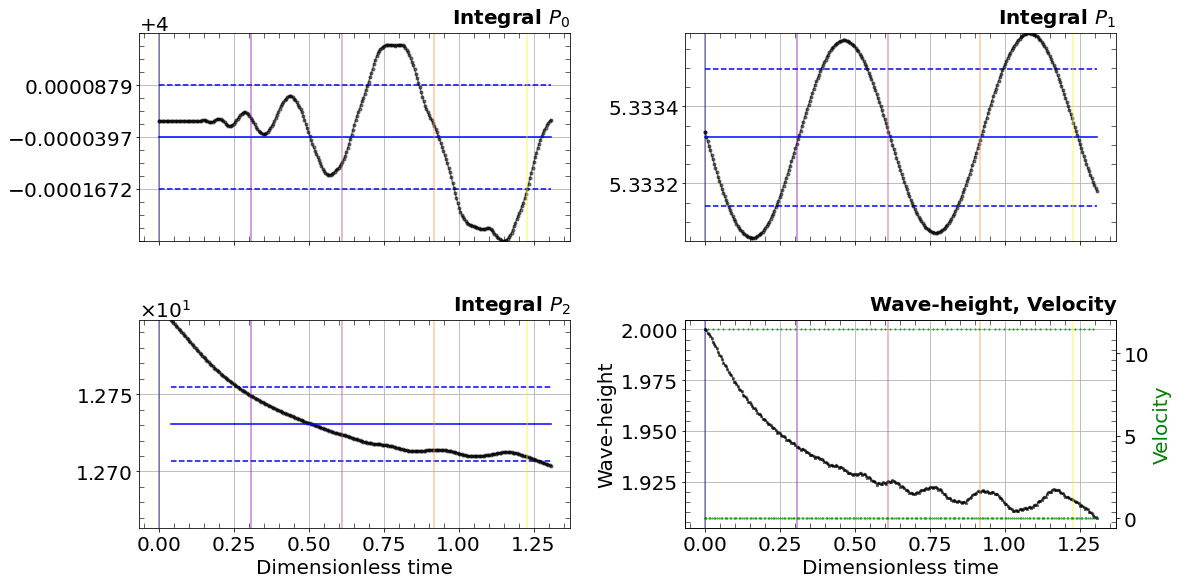

In [106]:
Plotter_Constants(int_0_depth_12,
                  int_1_depth_12,
                  int_2_depth_12,
                  [umaxs_depth_12[1],umaxs_depth_12[0]],
                  vel_depth_12,
                  allData_depth_12,
                  allTimes_depth_12,
                  integrals_depth_12,
                  xrange,
                  deltaT_depth_1,
                  name+'_int',
                  timerange=timerange_depth_12,
                  timeres=timeres_depth_12) 

<Figure size 432x288 with 0 Axes>

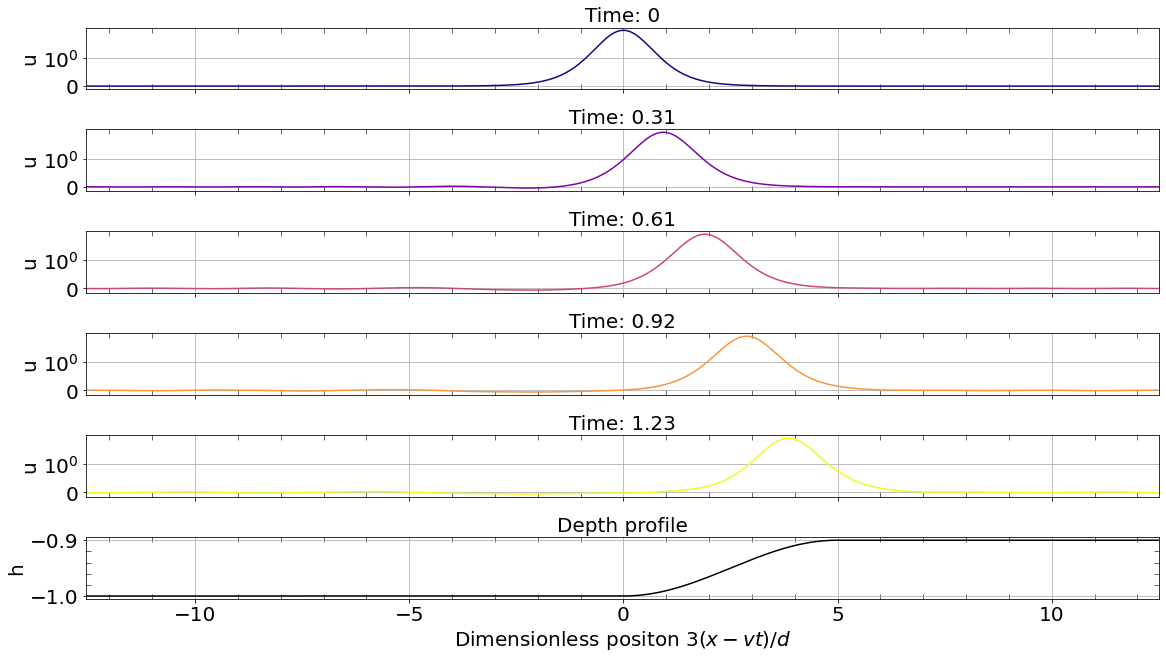

In [107]:
'''
Plotter_Integrals(allData_depth_12,
                  allTimes_depth_12,
                  integrals_depth_12,
                  xrange,
                  deltaT_depth_1,
                  name+'_int',
                  timerange=timerange_depth_12,
                  timeres=timeres_depth_12)  
'''
Plotter_Waves_DEPTH(allData_depth_12,
                    allTimes_depth_12,
                    integrals_depth_12,
                    xrange,
                    deltaT_depth_1,
                    name+'_waves',
                    h_0_2,
                    L,
                    positionrange=positionrange,
                    timerange=timerange_depth_12,
                    timeres=timeres_depth_12,
                    x_shift=x_shift)     

## 4.4) Underwaterhill h_0 = 0.9

In [108]:
# depth at the end
h_0_2 = 0.9
allData_depth_12_hill, allTimes_depth_12_hill = ZabuskyKruskal_DEPTH_hill(N_depth_1, 
                                                                          timesteps, 
                                                                          spacesteps, 
                                                                          deltaT_depth_1, 
                                                                          deltaX,
                                                                          h_0_2,
                                                                          L,
                                                                          x_shift=x_shift)

100%|████████████████████████████████████| 29998/29998 [00:50<00:00, 599.64it/s]


100%|███████████████████████████████████████| 301/301 [00:00<00:00, 1042.71it/s]


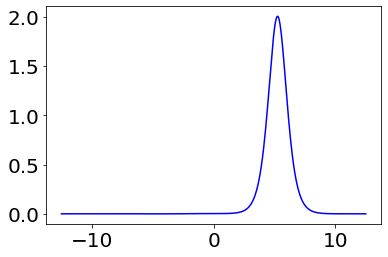

In [109]:
step_in_time = 1
ani_interval = 300

fig = plt.figure()
ims_depth_12 = []

for i in tqdm(range(0,len(allData_depth_12_hill),1)):
    
    if i%step_in_time==0:
        im = plt.plot(xrange,allData_depth_12_hill[i],color = 'b')
        ims_depth_12.append(im)
    
ani_depth_12 = animation.ArtistAnimation(fig, ims_depth_12, interval=ani_interval, blit=True)
HTML(ani_depth_12.to_html5_video())

## 4.4.1) Evaluating the Integrals

In [110]:
integrals_depth_12_hill, umaxs_depth_12_hill = INTEGRATER_2(allData_depth_12_hill,
                                                            allTimes_depth_12_hill,
                                                            deltaX,
                                                            deltaT_depth_1) 

100%|████████████████████████████████████████| 301/301 [00:01<00:00, 168.68it/s]


In [111]:
name = '1_soliton_h0_9_hill'
positionrange = [xrange[0],xrange[-1]]
timerange_depth_12_hill = [0.3,1.31]
timeres_depth_12_hill = 7000

int_0_depth_12_hill, mean_value_0_depth_12_hill, std_dev_0_depth_12_hill=FILTERED_MEAN_STD(integrals_depth_12_hill[0],
                                                                                           allTimes_depth_12_hill,
                                                                                           steps = 0.6)
int_1_depth_12_hill, mean_value_1_depth_12_hill, std_dev_1_depth_12_hill=FILTERED_MEAN_STD(integrals_depth_12_hill[1],
                                                                                           allTimes_depth_12_hill,
                                                                                           steps = 1)
int_2_depth_12_hill, mean_value_2_depth_12_hill, std_dev_2_depth_12_hill=FILTERED_MEAN_STD(integrals_depth_12_hill[2],
                                                                                           allTimes_depth_12_hill,
                                                                                           steps = 2)

int_0_depth_12_hill = [int_0_depth_12_hill, mean_value_0_depth_12_hill, std_dev_0_depth_12_hill]
int_1_depth_12_hill = [int_1_depth_12_hill, mean_value_1_depth_12_hill, std_dev_1_depth_12_hill]
int_2_depth_12_hill = [int_2_depth_12_hill, mean_value_2_depth_12_hill, std_dev_2_depth_12_hill]

vel_depth_12_hill=VELOCITY_CALC(allData_depth_12_hill,xrange,allTimes_depth_12_hill)

100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 13888.42it/s]
0it [00:00, ?it/s]


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
print(f'DeltaT: {deltaT_depth_1}, Totaltime: {deltaT_depth_1*timesteps}\n')
print(f'P_0 mean: {mean_value_0_depth_12_hill}, P_0 std: {std_dev_0_depth_12_hill}\n')
print(f'P_1 mean: {mean_value_1_depth_12_hill}, P_1 std: {std_dev_1_depth_12_hill}\n')
print(f'P_2 mean: {mean_value_2_depth_12_hill}, P_2 std: {std_dev_2_depth_12_hill}\n')
print(f'velocity mean: {vel_depth_12_hill[2]}, velocity std: {vel_depth_12_hill[3]}\n')
print(f'velocity max: {np.amax(vel_depth_12_hill[0])}, velocity min: {np.amin(vel_depth_12_hill[0])}\n')

In [ ]:
Plotter_Constants(int_0_depth_12_hill,
                  int_1_depth_12_hill,
                  int_2_depth_12_hill,
                  [umaxs_depth_12_hill[1],umaxs_depth_12_hill[0]],
                  vel_depth_12_hill,
                  allData_depth_12_hill,
                  allTimes_depth_12_hill,
                  integrals_depth_12_hill,
                  xrange,
                  deltaT_depth_1,
                  name+'_int',
                  timerange=timerange_depth_12_hill,
                  timeres=timeres_depth_12_hill) 

In [ ]:
'''
Plotter_Integrals(allData_depth_12_hill,
                  allTimes_depth_12_hill,
                  integrals_depth_12_hill,
                  xrange,
                  deltaT_depth_1,
                  name+'_int',
                  timerange=timerange_depth_12_hill,
                  timeres=timeres_depth_12_hill) 
'''

Plotter_Waves_DEPTH_hill(allData_depth_12_hill,
                         allTimes_depth_12_hill,
                         integrals_depth_12_hill,
                         xrange,
                         deltaT_depth_1,
                         name+'_waves',
                         h_0_2,
                         L,
                         positionrange=positionrange,
                         timerange=timerange_depth_12_hill,
                         timeres=timeres_depth_12_hill,
                         x_shift=x_shift) 
